<a href="https://colab.research.google.com/github/EllieMwangi/NaiveBayes-KNN-Classification/blob/main/Naive_Bayes_Spam_Email_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Email Detector

### Specifying Analysis Question


Build a naive bayes classifier that detects a spam email

### Defining the Metrics of Success

The model should be able to classify emails as spam or not with at least 80% accuracy.

### Understanding the context

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The collection of spam e-mails came from the creators' postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


### Recording the Experimental Design





- Load Data
- Data Cleaning
- Exploratory Data Analysis
- Data Modelling
- Model Evaluation
- Model improvement and tuning
- Conclusion
- Challenging the solution

## Data Loading

In [29]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Set global parameters
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)
warnings.filterwarnings('ignore')

In [2]:
with open('spambase.names') as file:
  names = file.read()
  print(names)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
columns_data= ['word_freq_make',
          'word_freq_address',      
          'word_freq_all',          
          'word_freq_3d',          
          'word_freq_our',          
          'word_freq_over',         
          'word_freq_remove',       
          'word_freq_internet',     
          'word_freq_order',        
          'word_freq_mail',         
          'word_freq_receive',      
          'word_freq_will',         
          'word_freq_people',       
          'word_freq_report',       
          'word_freq_addresses',    
          'word_freq_free',         
          'word_freq_business',     
          'word_freq_email',        
          'word_freq_you',          
          'word_freq_credit',       
          'word_freq_your',         
          'word_freq_font',         
          'word_freq_000',          
          'word_freq_money',        
          'word_freq_hp',           
          'word_freq_hpl',          
          'word_freq_george',       
          'word_freq_650',          
          'word_freq_lab',          
          'word_freq_labs',         
          'word_freq_telnet',       
          'word_freq_857',          
          'word_freq_data',         
          'word_freq_415',          
          'word_freq_85',           
          'word_freq_technology',   
          'word_freq_1999',         
          'word_freq_parts',        
          'word_freq_pm',           
          'word_freq_direct',       
          'word_freq_cs',           
          'word_freq_meeting',      
          'word_freq_original',     
          'word_freq_project',      
          'word_freq_re',           
          'word_freq_edu',          
          'word_freq_table',        
          'word_freq_conference',   
          'char_freq_;',            
          'char_freq_(',            
          'char_freq_[',            
          'char_freq_!',            
          'char_freq_$',            
          'char_freq_#',            
          'capital_run_length_average', 
          'capital_run_length_longest', 
          'capital_run_length_total',
          'spam']

In [4]:
# Load data
email_data = pd.read_csv('spambase.data', names=columns_data)

In [5]:
# Preview data
email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
email_data.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1103,0.00,0.0,0.37,0.0,1.13,0.00,0.37,0.0,0.00,0.75,0.0,0.37,0.00,0.00,0.0,0.37,0.75,0.00,2.65,0.0,1.13,0.0,0.37,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.13,0.00,0.0,0.0,0.000,0.063,0.0,0.882,0.189,0.000,4.080,78,253,1
2058,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.08,0.0,4.16,0.0,0.00,0.0,0.0,0.0,2.08,0.0,2.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,2.08,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.181,3,13,0
3474,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.11,0.0,0.0,0.0,0.0,0.0,11.11,0.00,0.0,0.0,0.000,1.492,0.0,0.000,0.000,0.000,1.571,4,11,0
1755,0.00,0.0,1.63,0.0,0.54,0.00,0.54,0.0,0.54,1.09,0.0,2.18,0.00,1.09,0.0,0.00,0.00,0.00,2.73,0.0,2.73,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.086,0.0,1.466,0.258,0.086,31.388,392,565,1
4520,0.09,0.0,0.48,0.0,0.00,0.29,0.00,0.0,0.00,0.09,0.0,0.00,0.19,0.00,0.0,0.09,0.19,0.58,1.35,0.0,0.38,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.38,3.10,0.0,0.0,0.015,0.030,0.0,0.000,0.046,0.000,1.722,17,267,0


In [7]:
# Shape of data
email_data.shape

(4601, 58)

In [8]:
# Information about the data
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [9]:
# Check missing values
null_checker = email_data.isnull().sum().sort_values(ascending=False)
null_checker[null_checker > 0]

Series([], dtype: int64)

In [10]:
# Check for duplicates
email_data.duplicated().sum()

391

In [11]:
# Drop duplicates
email_data.drop_duplicates(inplace=True)

In [12]:
# Before split data check proportion of target variable
email_data.spam.value_counts(normalize=True)*100

0    60.118765
1    39.881235
Name: spam, dtype: float64

In [30]:
# Spam variable is quite imbalanced thus apply SMOTE technique to handle imbalance

# Get X and Y
X = email_data.iloc[:, :-1]
y = email_data.spam

# Apply smote to x and y
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.3, random_state=23)

In [31]:
# Scale data
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
# Apply LDA decomposition

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)

# Get explained variation by lda
lda.explained_variance_ratio_

array([1.])

In [33]:
# First component explains 100% of the class difference
lda_pred = lda.predict(x_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       749
           1       0.92      0.87      0.89       770

    accuracy                           0.90      1519
   macro avg       0.90      0.90      0.90      1519
weighted avg       0.90      0.90      0.90      1519



LDA classifier predicts with 90% accuracy whether an email is a spam or not.

In [34]:
# Get the confusion matrix
print(confusion_matrix(y_test, lda_pred, labels=[0,1]))

[[693  56]
 [103 667]]


The LDA classifier does a better job of predicting the 0 class(non-spam emails) than the 1 class(spam class) with more false positive than false negatives.

In [35]:
# Apply Naive Bayes classifiers to lda transformed data

x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

gaussian_bayes = GaussianNB()
gaussian_bayes.fit(x_train_lda, y_train)

gaussian_pred = gaussian_bayes.predict(x_test_lda)

print(classification_report(y_test, gaussian_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       749
           1       0.92      0.87      0.89       770

    accuracy                           0.90      1519
   macro avg       0.90      0.90      0.90      1519
weighted avg       0.90      0.90      0.90      1519



In [36]:
# Get confusion matrix
matrix = confusion_matrix(y_test, gaussian_pred)
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,691,58
1,100,670


The Gaussian naive bayes classifier's performance is similar to the LDA classifier.

In [39]:
# Apply different test size split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.4, random_state=34)

# Scale data
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Apply LDA transformation
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

# Modelling
gaussian_bayes = GaussianNB()
gaussian_bayes.fit(x_train_lda, y_train)

gaussian_pred = gaussian_bayes.predict(x_test_lda)

print(classification_report(y_test, gaussian_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       995
           1       0.95      0.88      0.91      1030

    accuracy                           0.91      2025
   macro avg       0.91      0.91      0.91      2025
weighted avg       0.91      0.91      0.91      2025



In [40]:
# Get confusion matrix
matrix = confusion_matrix(y_test, gaussian_pred)
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,944,51
1,128,902


With a bigger test size(40%), the performance of the model improves by 1 percent. The false positive cases are still higher than false negative cases. 

In [41]:
# Apply different test size split: 20%

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=70)

# Scale data
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Apply LDA transformation
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

# Modelling
gaussian_bayes = GaussianNB()
gaussian_bayes.fit(x_train_lda, y_train)

gaussian_pred = gaussian_bayes.predict(x_test_lda)

print(classification_report(y_test, gaussian_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       525
           1       0.94      0.87      0.90       488

    accuracy                           0.91      1013
   macro avg       0.91      0.91      0.91      1013
weighted avg       0.91      0.91      0.91      1013



In [42]:
# Get confusion matrix
matrix = confusion_matrix(y_test, gaussian_pred)
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,497,28
1,62,426


Performance is similar to when the test size is 40%. Accuracy is 91% and the false positive cases are still higher than false negative cases. 

### Conclusion

The best gaussian naive bayes classifiers have an accuracy of 91% and a test set that is 20% or 40%. To handle the imbalance in the data, SMOTE with k_neighbors = 1 has been applied. The SMOTE transformed data is then scaled with a MinMaxScaler and decomposed using LDA with 2 components.

### Challenging the Solution

Text(0, 0.5, 'Cumulative explained Variance Ratio')

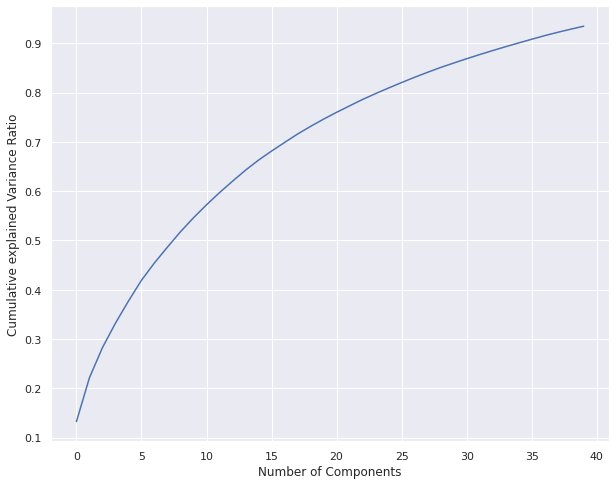

In [48]:
# To regularize the data before decomposition, apply PCA

pca = PCA(n_components=40).fit(x_train)
env = pca.explained_variance_ratio_

plt.figure(figsize=(10,8))
plt.plot(__builtin__.range(len(env)), env.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained Variance Ratio')

Approximately 35 components explain about 90% variance in our data.

In [49]:
# Transform data
pca = PCA(n_components=35)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [50]:
# Perform LDA to PCA transformed data
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train_pca, y_train)

# Get explained variation by lda
lda.explained_variance_ratio_

array([1.])

In [51]:
# Apply LDA transformation
x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)

# Modelling
gaussian_bayes = GaussianNB()
gaussian_bayes.fit(x_train_lda, y_train)

gaussian_pred = gaussian_bayes.predict(x_test_lda)

print(classification_report(y_test, gaussian_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       525
           1       0.93      0.84      0.89       488

    accuracy                           0.89      1013
   macro avg       0.90      0.89      0.89      1013
weighted avg       0.90      0.89      0.89      1013



In [52]:
# Get confusion matrix
matrix = confusion_matrix(y_test, gaussian_pred)
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,494,31
1,76,412


After applying PCA before decomposition, performance drops to 89%